# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [3]:
for i, city in enumerate(cities):
    print(i, city)

0 hithadhoo
1 flinders
2 puerto ayora
3 bengkulu
4 arraial do cabo
5 vila velha
6 hilo
7 vallenar
8 leningradskiy
9 narsaq
10 bluff
11 upernavik
12 mataura
13 hasaki
14 port elizabeth
15 ust-nera
16 yellowknife
17 ushuaia
18 mys shmidta
19 tautira
20 new norfolk
21 nizhneyansk
22 busselton
23 tabiauea
24 tuktoyaktuk
25 gualaceo
26 peniche
27 pangai
28 katsuura
29 atuona
30 tasiilaq
31 santa rita do passa quatro
32 cidreira
33 torbay
34 kapaa
35 makakilo city
36 sitka
37 poum
38 atambua
39 san cristobal
40 darnah
41 lompoc
42 kresek
43 vostok
44 riyadh
45 praia da vitoria
46 palora
47 barrow
48 lata
49 illoqqortoormiut
50 zhigansk
51 khatanga
52 half moon bay
53 albany
54 labuan
55 hermanus
56 port hedland
57 jamestown
58 vaini
59 chokurdakh
60 provideniya
61 regenstauf
62 maiduguri
63 hobart
64 alugan
65 bambous virieux
66 rikitea
67 nouadhibou
68 bethel
69 saint-paul
70 celina
71 inuvik
72 sao filipe
73 mahebourg
74 jiazi
75 punta arenas
76 oriximina
77 kracheh
78 thompson
79 airai
80

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
x = url + cities[0] + '&appid=' + weather_api_key

request = requests.get(x)
response = request.json()
pprint(response)
# print(json.dumps(response, indent=4))

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': -0.6, 'lon': 73.0833},
 'dt': 1681064288,
 'id': 1282256,
 'main': {'feels_like': 303.48,
          'grnd_level': 1012,
          'humidity': 69,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 301.04,
          'temp_max': 301.04,
          'temp_min': 301.04},
 'name': 'Hithadhoo',
 'sys': {'country': 'MV', 'sunrise': 1681002369, 'sunset': 1681045934},
 'timezone': 18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 88, 'gust': 0.91, 'speed': 0.62}}


In [5]:
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

https://openweathermap.org/current

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + '&appid=' + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        request = requests.get(city_url)
        response = request.json()

        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | flinders
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | vallenar
Processing Record 9 of Set 1 | leningradskiy
Processing Record 10 of Set 1 | narsaq
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | tautira
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | nizhney

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,27.89,69,5,0.62,MV,1681064295
1,flinders,-34.5833,150.8552,11.77,74,9,1.79,AU,1681064295
2,puerto ayora,-0.7393,-90.3518,29.98,84,41,3.13,EC,1681064296
3,bengkulu,-3.8004,102.2655,24.20,90,93,1.89,ID,1681064296
4,arraial do cabo,-22.9661,-42.0278,24.98,78,100,4.12,BR,1681064296


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,27.89,69,5,0.62,MV,1681064295
1,flinders,-34.5833,150.8552,11.77,74,9,1.79,AU,1681064295
2,puerto ayora,-0.7393,-90.3518,29.98,84,41,3.13,EC,1681064296
3,bengkulu,-3.8004,102.2655,24.20,90,93,1.89,ID,1681064296
4,arraial do cabo,-22.9661,-42.0278,24.98,78,100,4.12,BR,1681064296


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

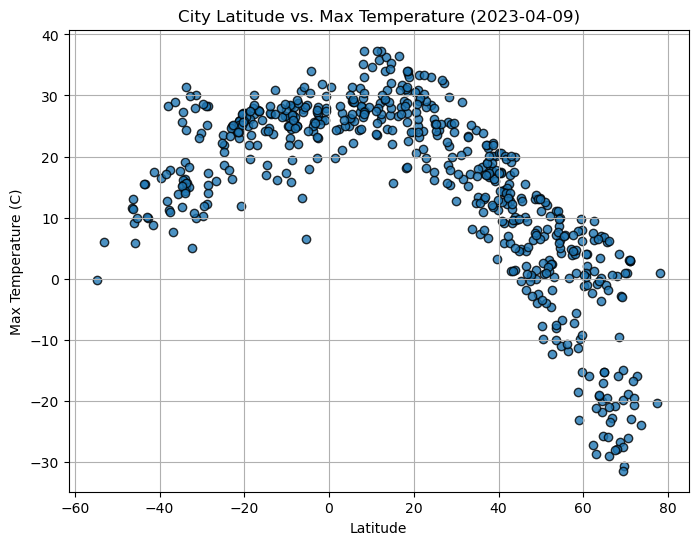

In [15]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
# plt.style.use('seaborn-whitegrid')
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Max Temp'], alpha=0.8, linewidths=1, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2023-04-09)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

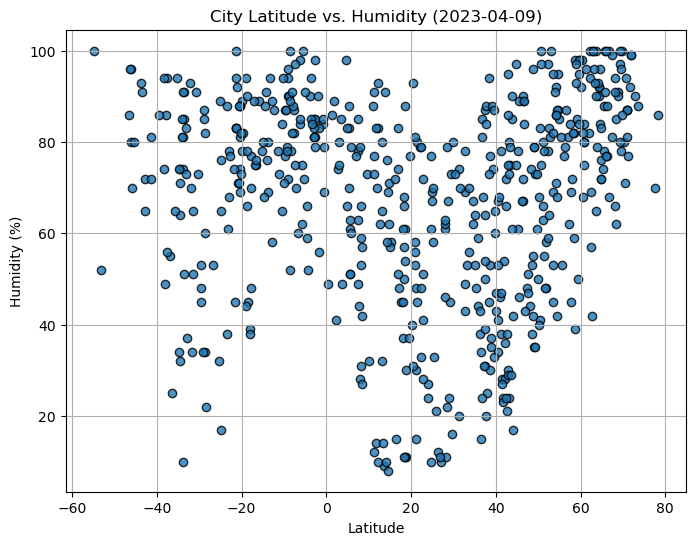

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Humidity'], alpha=0.8, linewidths=1, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2023-04-09)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

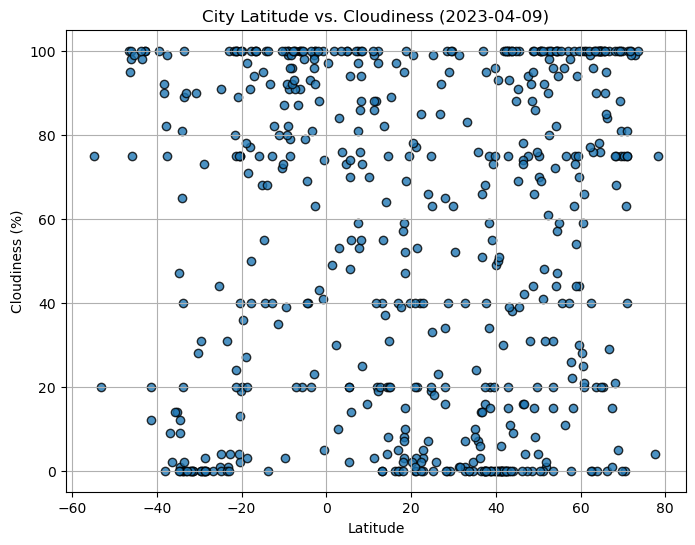

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Cloudiness'], alpha=0.8, linewidths=1, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-04-09)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

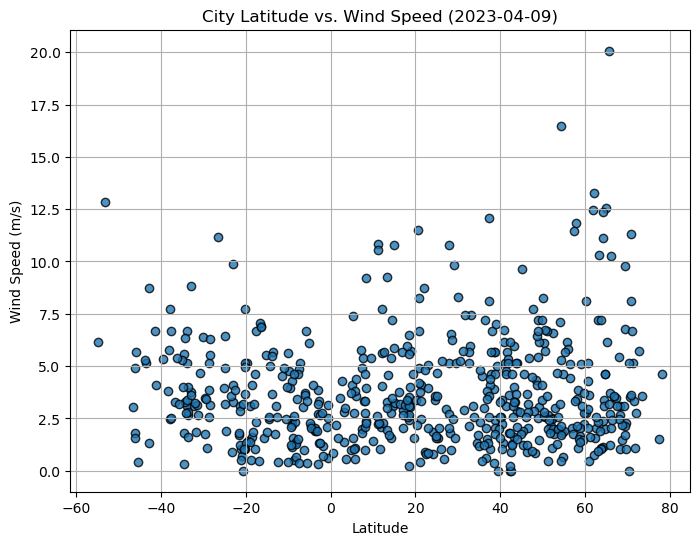

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(x=city_data_df['Lat'], y=city_data_df['Wind Speed'], alpha=0.8, linewidths=1, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-04-09)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_reg_plot(df, x, y):
    slope, intercept, r_value, p_value, std_err = linregress(df[x], df[y])
    fit_line = intercept + slope * df[x]
    print(f'The r-value is: {r_value}')
    line_eq = f'y = {round(slope, 2)}*x + {round(intercept, 2)}'

    plt.figure(figsize=(8, 6))
    plt.scatter(x=df[x], y=df[y])
    plt.plot(df[x], fit_line, color='r', label='y={:.2f}x+{:.2f}'.format(slope, intercept))
    plt.annotate(line_eq, xy=(min(df[x])+5, min(df[y])+5), color='r', fontsize=15)
    plt.xlabel('Latitude')
    plt.ylabel(y)
    plt.grid(False)
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,hilo,19.7297,-155.0900,23.95,77,40,1.54,US,1681064117
8,leningradskiy,69.3833,178.4167,-19.85,97,100,6.77,RU,1681064003
9,narsaq,60.9167,-46.0500,2.12,80,100,0.45,GL,1681064297
11,upernavik,72.7868,-56.1549,-15.85,90,99,5.70,GL,1681064298
13,hasaki,35.7333,140.8333,7.34,59,7,4.51,JP,1681064298


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,27.89,69,5,0.62,MV,1681064295
1,flinders,-34.5833,150.8552,11.77,74,9,1.79,AU,1681064295
2,puerto ayora,-0.7393,-90.3518,29.98,84,41,3.13,EC,1681064296
3,bengkulu,-3.8004,102.2655,24.20,90,93,1.89,ID,1681064296
4,arraial do cabo,-22.9661,-42.0278,24.98,78,100,4.12,BR,1681064296


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8640536007448527


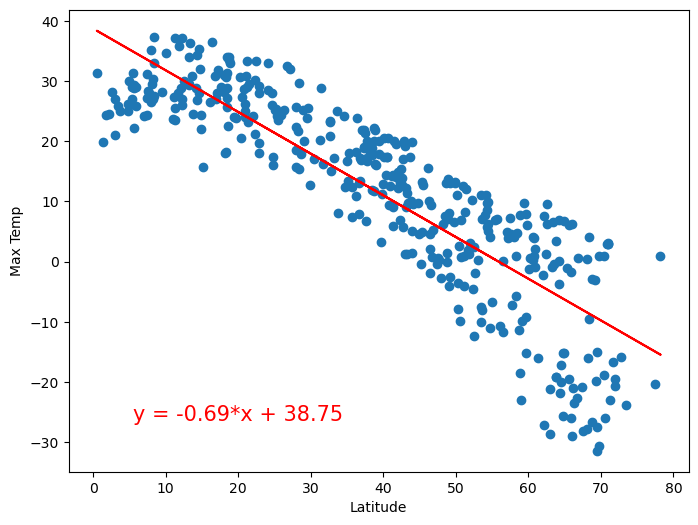

In [22]:
# Linear regression on Northern Hemisphere
linear_reg_plot(northern_hemi_df, x='Lat', y='Max Temp')

The r-value is: 0.6392677301635252


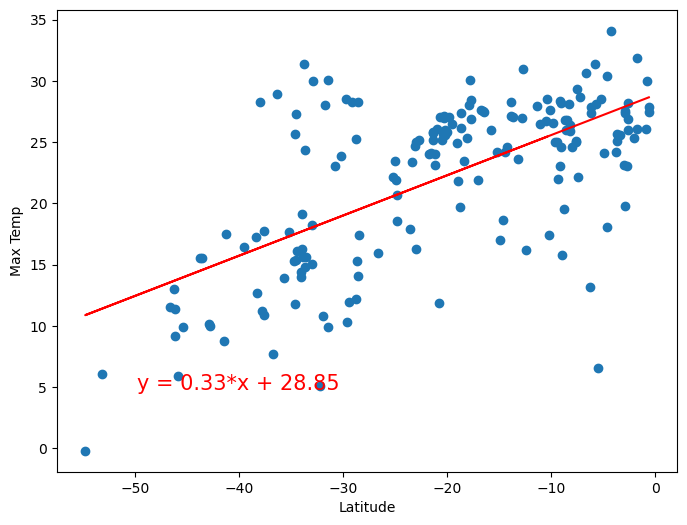

In [23]:
# Linear regression on Southern Hemisphere
linear_reg_plot(southern_hemi_df, x='Lat', y='Max Temp')

**Discussion about the linear relationship:**   2023/04/09
<br><br>
Based on the two regression plots we created above, first for Northern Hemisphere and second for the Southern, we can see that the first slope that we got was negative with the second was positive. The reason for the two slopes were exactly in the opposite direction is because the x-axis range was from `0 to 80`, and from `below -50 to 0`, accordingly. Since we selected the cities randomly, so there're more cities located in the Northern Hemisphere in this case. 
<br><br>
According to the linear regression equation we got, we can say that with the Latitude increase by 1 in the Northern Hemisphere, the Max Temperature will be down 0.69 degree. And in Southern Hemisphere, when Latitude increase by 1, the Max Temperature will go up 0.33 degree, since the Latitude should all be negative value.
<br><br>
When Latitude is 0 (Equator), the Max Temperature in Northern Hemisphere is 38.75 degree, and 28.85 for Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40479711628287773


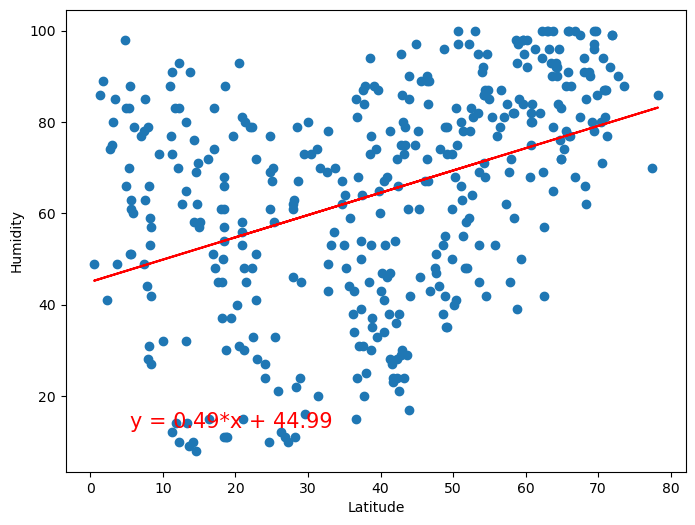

In [24]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df, x='Lat', y='Humidity')

The r-value is: 0.20624401082980526


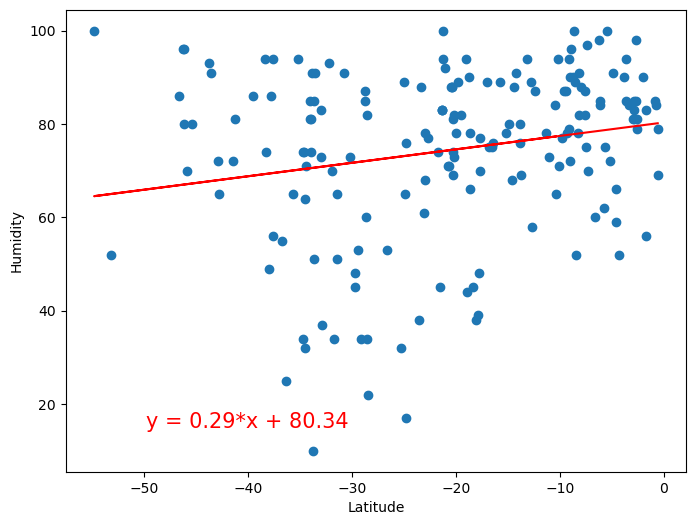

In [25]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df, x='Lat', y='Humidity')

**Discussion about the linear relationship:**   2023/04/09
<br><br>
For both Northern and Southern Hemisphere, the relationship between Latitude and Humidity is positive. When Latitude increases by 1, the Humidity will go up for 0.49(%) in Northern Hemisphere, and 0.29(%) for Southern Hemisphere. Since the opposite of the Latitude, in Northern Hemisphere, when it's getting far away from the Equator, the higher the Humidity. In the other hand, when it's getting away from the Equator in Southern Hemisphere, the lower the Humidity.   
<br>
When the Latitude is 0 (Equator), the humidity in Northern Hemisphere is 44.99(%), and 80.34(%) for Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16934724154508668


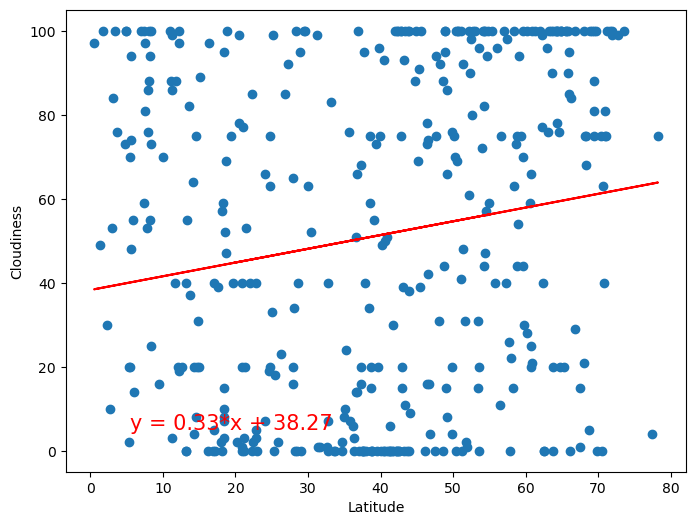

In [26]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df, x='Lat', y='Cloudiness')

The r-value is: 0.29205805091886466


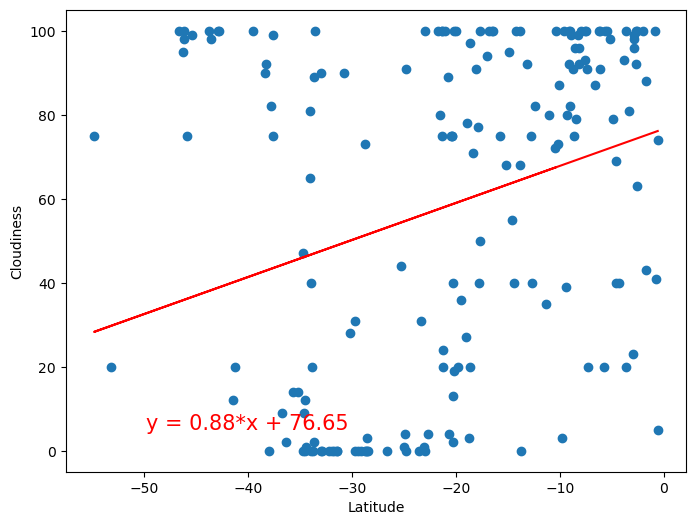

In [27]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df, x='Lat', y='Cloudiness')

**Discussion about the linear relationship:**   2023/04/09
<br><br>
We can tell by looking at the two plots above to say that we have more city data in the Northern Hemisophere than the Southern. Latitude has a stronger positive relationship with Cloudiness in Southern Hemisphere than in the Northern. When Latitude increases by 1, the Cloudiness will also go up 0.88 in Southern Hemisphere, which might mean that it's hard to be cloudy around the South Pole area. In Northern Hemisphere, Latitude doesn't affect Cloudiness as much as in Southern, it's still positive related, but a high/low Cloudiness could be observed in a wide range of Latitude.
<br><br>
When the Latitude is 0 (Equator), the Cloudiness in Northern Hemisphere is 38.27(%), and 76.65(%) for Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06571014537985453


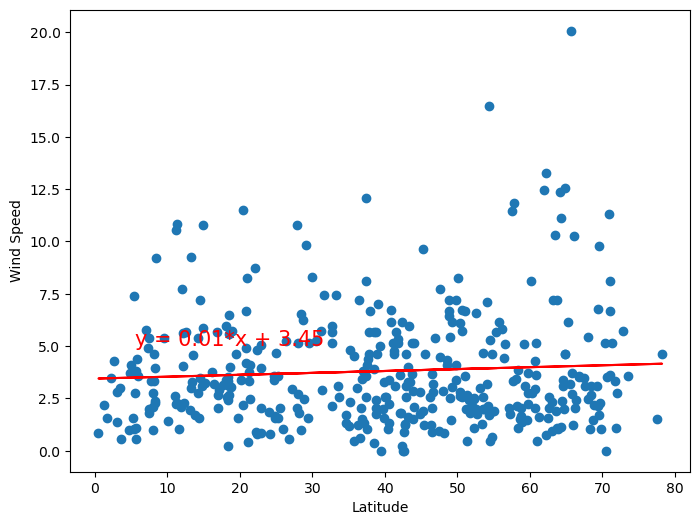

In [29]:
# Northern Hemisphere
linear_reg_plot(northern_hemi_df, x='Lat', y='Wind Speed')

The r-value is: -0.3324699392163111


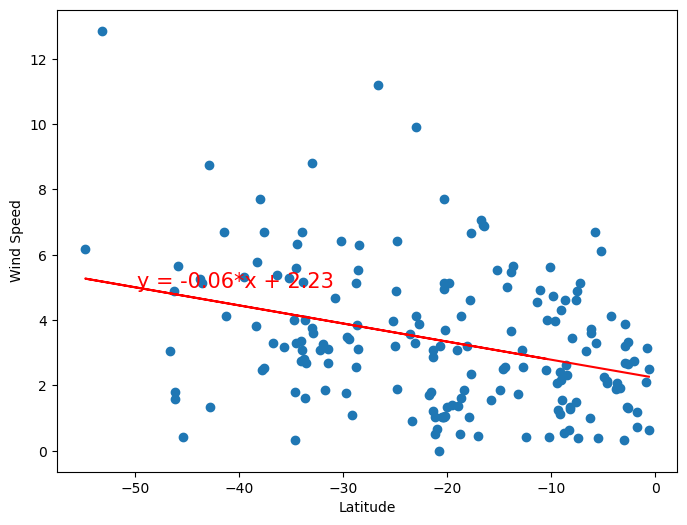

In [30]:
# Southern Hemisphere
linear_reg_plot(southern_hemi_df, x='Lat', y='Wind Speed')

**Discussion about the linear relationship:** 2023/04/09
<br><br>
The relationship between Latitude and Wind Speed is positive in Northern Hemisphere, but negative in Southern Hemisphere. The data is more gathered in a relatively low Wind Speed accross all Latitude in Northern Hemisphere, and as the Latitude increases, the Wind Speed does not increase as well that much (slope = 0.01). As in Southern Hemisphere, the data is more discrete.
<br><br>
When the Latitude is 0 (Equator), the Wind Speed in Northern Hemisphere is 3.45(m/s), and 2.23(m/s) for Southern Hemisphere, which is quite close.